In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv("titanic.csv")

In [57]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

X = np.array(data.drop('Survived', axis=1))
Y = np.array(data['Survived']).reshape(-1, 1)

C:\Users\mruna\AppData\Local\Temp\ipykernel_35264\2470615276.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\mruna\AppData\Local\Temp\ipykernel_35264\2470615276.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [59]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [60]:
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
split = int(0.8 * X.shape[0])

train_idx, test_idx = indices[:split], indices[split:]
X_train, X_test = X[train_idx], X[test_idx]
Y_train, Y_test = Y[train_idx], Y[test_idx]


In [61]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    m = y.shape[0]
    return - (1/m) * np.sum(y*np.log(y_pred + 1e-9) + (1-y)*np.log(1-y_pred + 1e-9))

def train_logistic_regression(X, Y, lr=0.01, epochs=2000):
    m, n = X.shape
    W = np.zeros((n, 1))
    b = 0
    losses = []

    for i in range(epochs):
        Z = np.dot(X, W) + b
        Y_pred = sigmoid(Z)

        # Compute loss
        loss = compute_loss(Y, Y_pred)
        losses.append(loss)

        # Gradient Descent
        dW = (1/m) * np.dot(X.T, (Y_pred - Y))
        db = (1/m) * np.sum(Y_pred - Y)

        W -= lr * dW
        b -= lr * db

        if i % 200 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}")

    return W, b, losses

def predict(X, W, b):
    Y_pred = sigmoid(np.dot(X, W) + b)
    return (Y_pred >= 0.5).astype(int)


In [62]:
W, b, losses = train_logistic_regression(X_train, Y_train, lr=0.01, epochs=5000)

Epoch 0: Loss = 0.6931
Epoch 200: Loss = 0.5476
Epoch 400: Loss = 0.4984
Epoch 600: Loss = 0.4764
Epoch 800: Loss = 0.4648
Epoch 1000: Loss = 0.4581
Epoch 1200: Loss = 0.4540
Epoch 1400: Loss = 0.4513
Epoch 1600: Loss = 0.4495
Epoch 1800: Loss = 0.4482
Epoch 2000: Loss = 0.4473
Epoch 2200: Loss = 0.4467
Epoch 2400: Loss = 0.4462
Epoch 2600: Loss = 0.4458
Epoch 2800: Loss = 0.4455
Epoch 3000: Loss = 0.4453
Epoch 3200: Loss = 0.4451
Epoch 3400: Loss = 0.4450
Epoch 3600: Loss = 0.4449
Epoch 3800: Loss = 0.4448
Epoch 4000: Loss = 0.4448
Epoch 4200: Loss = 0.4447
Epoch 4400: Loss = 0.4447
Epoch 4600: Loss = 0.4446
Epoch 4800: Loss = 0.4446


In [63]:
Y_pred_train = predict(X_train, W, b)
Y_pred_test = predict(X_test, W, b)

In [64]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-9)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-9)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r + 1e-9)

In [65]:
train_acc = accuracy(Y_train, Y_pred_train)
test_acc = accuracy(Y_test, Y_pred_test)
prec = precision(Y_test, Y_pred_test)
rec = recall(Y_test, Y_pred_test)
f1 = f1_score(Y_test, Y_pred_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Training Accuracy: 0.7978
Testing Accuracy : 0.7765
Precision: 0.6812
Recall: 0.7231
F1 Score: 0.7015


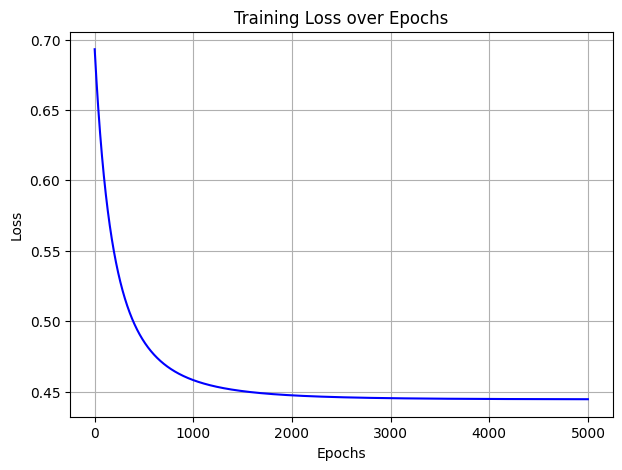

In [66]:
plt.figure(figsize=(7,5))
plt.plot(losses, color='blue')
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

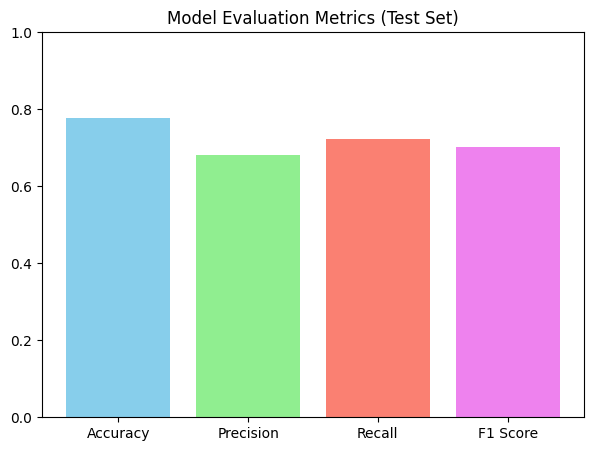

In [67]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [test_acc, prec, rec, f1]

plt.figure(figsize=(7,5))
plt.bar(metrics, values, color=['skyblue','lightgreen','salmon','violet'])
plt.title("Model Evaluation Metrics (Test Set)")
plt.ylim(0,1)
plt.show()

In [68]:
tp = np.sum((Y_test == 1) & (Y_pred_test == 1))
tn = np.sum((Y_test == 0) & (Y_pred_test == 0))
fp = np.sum((Y_test == 0) & (Y_pred_test == 1))
fn = np.sum((Y_test == 1) & (Y_pred_test == 0))

conf_matrix = np.array([[tn, fp],
                        [fn, tp]])


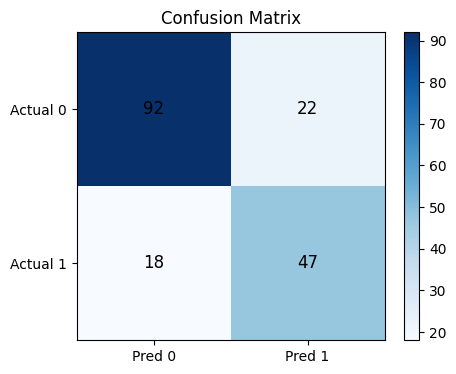

In [69]:
plt.figure(figsize=(5,4))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.xticks([0,1], ['Pred 0', 'Pred 1'])
plt.yticks([0,1], ['Actual 0', 'Actual 1'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)
plt.colorbar()
plt.show()